

# Project: Investigate a Dataset - [noshowappointments-kagglev2-may-2016.csv]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

### Dataset Description 

>  In this section of the report,I'm going to provide a brief introduction to the dataset I've selected/downloaded for analysis.


### Questions for Analysis
> Research Question 1 (what is the over all show appointment and each value share and the distribution of the variables?)

>Research Question 2  (Does the age contribute to the attendance of the appointment?)

>Research Question 3  (does sms contribute to the attendance of the appointment?)

>Research Question 4  (does alcholism contribute to the attendance of the appointment?)

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
# Data Wrangling

>  In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 



In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#data shape
df.shape

(110527, 14)

In [5]:
#   types and look for instances of missing or possibly errant data or duplicated data.
df.dtypes , df.info() , df.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


(PatientId         float64
 AppointmentID       int64
 Gender             object
 ScheduledDay       object
 AppointmentDay     object
 Age                 int64
 Neighbourhood      object
 Scholarship         int64
 Hipertension        int64
 Diabetes            int64
 Alcoholism          int64
 Handcap             int64
 SMS_received        int64
 No-show            object
 dtype: object, None, 0)

In [6]:
#data descriotion
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



### Data Cleaning
> as we have seen from the section above the data doesn't have any null or duplicates that need to be removed or modified but by looking at the data types all values of dependant columns variables are int type while the dependant variable no show is not so we need to change it's type  also we need to change dates columns to date type lastly for avoiding problems in coding i'm going to change the columns labels from spaces to underscore ,removing spaces and lower case the letters so to arrange the steps
1)rename columns
2)change columns data type
 

In [7]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
#rename columns labels to avoid problems while coding
df.rename(columns= lambda x: x.strip().lower().replace(" ","_"),inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
#convert no_show column to int
df['no-show'].astype(str)
df.dtypes
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
#no_show column unique values-to copy them as they have been written-
df['no-show'].value_counts()
#convert Yes and No to 1 and 0
df['no-show'].replace(("Yes","No"),(1,0),inplace=True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [10]:
#convert columns to date time
df['scheduledday'] = pd.to_datetime(df['scheduledday'])
df['appointmentday'] = pd.to_datetime(df['appointmentday'])
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [11]:
#removing age that equales zero
df= df.query('age > 0')
#making sure age<0 is removed
df.shape

(106987, 14)

In [12]:
#creating age categories
df['age'].describe()
edge=[1,19,38,56,115]
names=['from 1 to 19','from 19 to 38','from 38 to 56','older than 56']
#create age category column
df['age_category']=pd.cut(df['age'],edge,labels=names)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,age_category
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,older than 56
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,from 38 to 56
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,older than 56
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,from 1 to 19
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,from 38 to 56


In [13]:
df.to_csv('no_show_modified.csv',index='False')

In [14]:
pd.read_csv('no_show_modified.csv')
df.shape
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show,age_category
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,older than 56
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,from 38 to 56
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,older than 56
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,from 1 to 19
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,from 38 to 56


<a id='eda'></a>
# Exploratory Data Analysis

>  Now after cleaning your data, we are going to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that i've posed in the Introduction section. 

### Research Question 1 (what is the over all show appointment and each value share and the distribution of the variables?)

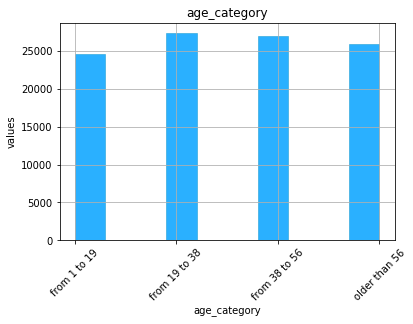

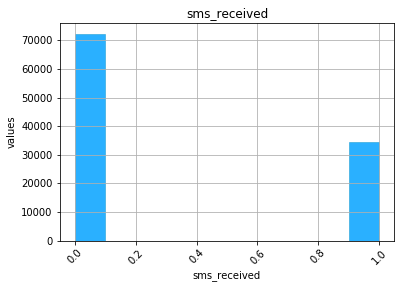

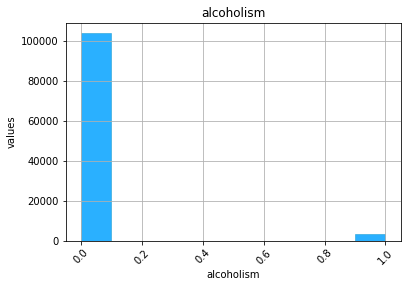

                 age
count  106987.000000
mean       38.316085
std        22.466214
min         1.000000
25%        19.000000
50%        38.000000
75%        56.000000
max       115.000000
        sms_received
count  106987.000000
mean        0.323264
std         0.467725
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
          alcoholism
count  106987.000000
mean        0.031406
std         0.174412
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000


In [15]:
#exploring age_category,sms_received,alcoholism with visual

columns=['age_category','sms_received','alcoholism']

for c in columns:
    df[c].hist(facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
    plt.title(c)
    plt.xlabel(c)
    plt.ylabel('values')
    plt.xticks(rotation=45)
    plt.show()
    
columns_b=['age','sms_received','alcoholism']

for b in columns_b:
    des=pd.DataFrame(df[b].describe())
    print(des)


from the exbloration above :

> it's almost 50% are at the age og 38 years old

>  almost 50% hasn't recevied sms message to remind them of the appointmenrt

> it's clear that the majorty of people enrolled in the healthcare programme are no-alcholic.

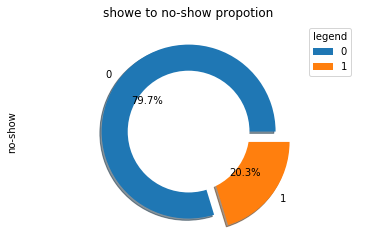

,no-show
count,106987.000000
mean,0.202641
std,0.401969
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [16]:
# exploring no-show
plt.axis('equal')
df['no-show'].value_counts().plot(kind='pie',autopct='%0.1f%%',shadow=True,explode=[0,.2]);
plt.title('showe to no-show propotion')
plt.legend(title="legend")
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()
pd.DataFrame(df['no-show'].describe())

> from data exploration with visual we can see that there is a good amount of people who didn't show to the medical appointments , also the distribution of age column shows that most ages are between 1-60 years old and there is a small fraction of people who are addicted to alchol 

> in the section below we are going to try to answer if the alcholism , age and sms sent contribute to the appointment show or not ?

### Research Question 2  (Does the age has relation to the attendance of the appointment?)

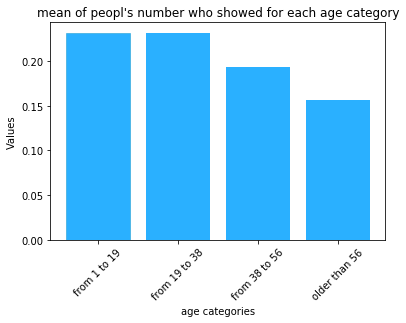

In [17]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df.groupby('age_category')['no-show'].mean()
locations=[1,2,3,4]
heights=[0.2311,0.2319,0.1931,0.156]
labels=['from 1 to 19','from 19 to 38','from 38 to 56','older than 56']

#create bar chart 
p1=plt.bar(locations,heights,tick_label=labels , facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.xticks(rotation=45)
plt.title("mean of peopl's number who showed for each age category") 
plt.xlabel('age categories') 
plt.ylabel('Values') 
plt.show();

> people from age 1 to 38 are the most who showed to the appointment

### Research Question 3  (does sms has a relation to the attendance of the appointment?)

In [18]:
sms_mean_value=df.groupby('sms_received')['no-show'].mean()
print(sms_mean_value)

sms_received
0    0.167288
1    0.276652
Name: no-show, dtype: float64


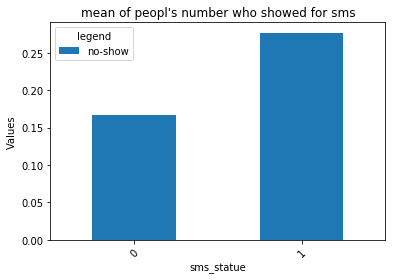

In [19]:
df.groupby('sms_received')['no-show'].mean().plot(kind='bar')
plt.xticks(rotation=45)
plt.title("mean of peopl's number who showed for sms") 
plt.xlabel('sms_statue') 
plt.ylabel('Values') 
plt.legend(title="legend")
plt.show();

> sms contributed in peopl's appearence to the appointment as it shown in the diagram

### Research Question 4  (does alcholism has relation  to the attendance of the appointment?)

In [20]:
alcholism_mean_values=df.groupby('alcoholism')['no-show'].mean()
print(alcholism_mean_values)

alcoholism
0    0.202679
1    0.201488
Name: no-show, dtype: float64


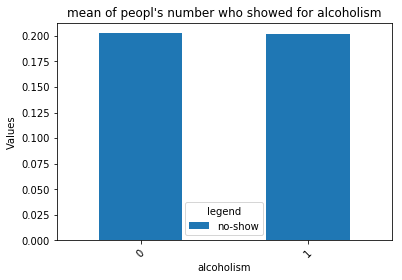

In [21]:
df.groupby('alcoholism')['no-show'].mean().plot(kind='bar')
plt.xticks(rotation=45)
plt.title("mean of peopl's number who showed for alcoholism") 
plt.xlabel('alcoholism') 
plt.ylabel('Values') 
plt.legend(title="legend")
plt.show();

> both the mean of number of people who are alcholic and the ones who aren't is equal 

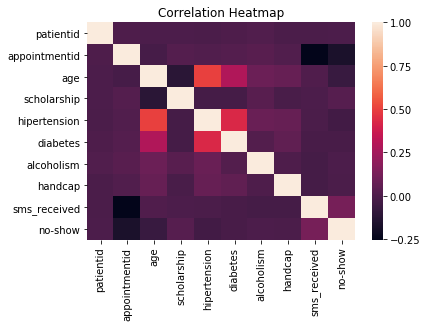

In [22]:
heatmap = sns.heatmap(df.corr())
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap');


> here we can see the correlation between no-show and all other columns , we can see that sms_recieved is the highest one in correlation with show appointment then comes age and finally alcholism is the less one in correlation with showing to the appointment , so it's important as we see from the chart above to keep sending sms to patients in order to guarantee them showing up to the medical appointment

 # conclusions
 > In this research, i addressed the problem of recognition of structures in images using graph representations as the main problem is 79.9% of people didn't show for their medical appointment.
 
 > then an exploration to data has been done to better understand the distribution of three variables that might affect  the no-show of patients to the medical apointment and it has been done by histogram graph .
 
 >A discussion on different representations to know the relationship between no-show appointments and other variables like sms_recieved has been provided. 
In particular,i proposed graphs in the relationship between no appointment show and (age-sms-alcholism).

 >As we can see in our investigation the Age and sms contributed whether the patient would come or not while the alcholism didn't 
 
 >for age the most older age isn't showing although they are supposed to be the most- because of older age common illness-  it's maybe due to the condition that the government has put a law that enforce showing is related to the young children in the family  would be allowed to attend school or not, that's why age category from (1 to 38) is the highest in showing as it's the most commomn age to have young children -if there was a family in the first place-.
 
 >for sms_sent it's clear that it contributed very well in people showing to their appointments as it work as a reminder to people to not miss out their appointment.
 
 ### limitations
  >time limitation played a role in investigating further relations and information with more variables

### futre work
>Many different analysis have been left for the future due to lack
of time ,Future work concerns deeper analysis of more varibles and a
new proposals to try test relations between different variables.

# references
> FWD community questions

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0